Assumptions based on details provided: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

This link was used to make assumptions for Question 6 where intuitive understanding implied that am = 1 corresponds to automatic cars and am = 0 corresponds to manual cars. However since the MTCars dataset has a lot of online resources available, I used the details that have been provided in the above link for any assumptions required in the assignment. 

###Set 1: Dataset - mtcars

In [1]:
#loading mtcars dataset
import statsmodels.api as sm
mtcars = sm.datasets.get_rdataset('mtcars')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = mtcars.data

In [3]:
#importing necessary libraries 
import numpy
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#resetting index value to access car name column
df = df.reset_index()

In [5]:
df = df.rename(columns={"index":"car"})

In [6]:
#printing information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   car     32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
df.head(n=5)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
df.tail(n=5)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


### Question 1. Find the car with the best mpg, worst mpg.

In [9]:
#Best MPG
max_mpg = max(df['mpg'])
for car in df.loc[df['mpg'] == max_mpg]['car']:
  print(car, max_mpg)

Toyota Corolla 33.9


In [10]:
#Alternative method to the above code
#print(df.loc[df['mpg'] == max_mpg]['car'].to_string(index=False), max_mpg)

In [11]:
#Worst MPG
min_mpg = min(df['mpg'])
for car in df.loc[df['mpg'] == min_mpg]['car']:
  print(car, min_mpg)

Cadillac Fleetwood 10.4
Lincoln Continental 10.4


### Question 2. Find the car with the worst horsepower, best qsec. 

In [12]:
#Worst horsepower
worst_hp = min(df['hp'])
for car in df.loc[df['hp'] == worst_hp]['car']:
  print(car, worst_hp)

Honda Civic 52


In [13]:
#Best QSEC
best_qsec = max(df['qsec'])
for car in df.loc[df['qsec'] == best_qsec]['car']:
  print(car, best_qsec)

Merc 230 22.9


### Question 3. Find 5 number summary and draw the boxplot of displacement

In [14]:
#Finding the 5 number summary for disp
quartiles = percentile(df['disp'], [0, 25, 50, 75, 100])

In [15]:
for i in range(len(quartiles)):
  print(25*i, quartiles[i])

0 71.1
25 120.825
50 196.3
75 326.0
100 472.0


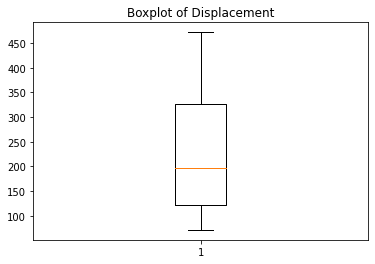

In [16]:
plt.boxplot(quartiles)
plt.title('Boxplot of Displacement') 
plt.show()

### Question 4. Draw a histogram for MPG and comment on the distribution. 

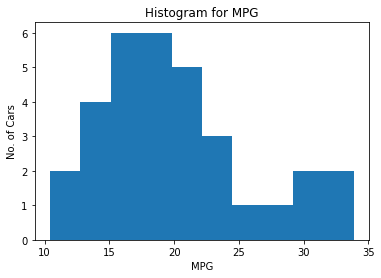

In [17]:
plt.hist(df['mpg'])

plt.xlabel('MPG') 
plt.ylabel('No. of Cars') 
plt.title('Histogram for MPG') 
plt.show()

**Comments:**
The above histogram displays the frequency of a particular MPG value in the MTCars Dataset. In other words it plots the number of cars corresponding to a particular MPG value v/s the MPG value. 

With the distrubution that this histogram provides, we can visualize which MPG values are most common in the dataset and which ones are least common. Here, we see that most common range of MPG is 15-20. 

### Question 5. What is average MPG for manual vs. automatic cars?

In [18]:
avg_mpg_automatic = df[df['am'] == 0]['mpg'].mean()
print(avg_mpg_automatic)

17.147368421052633


In [19]:
avg_mpg_manual = df[df['am'] == 1]['mpg'].mean()
print(avg_mpg_manual)

24.39230769230769


### Question 6. Draw a side by side box plot of fuel efficiency (MPG) for transmission (manual vs. automatic) cars. Analyze and write about fuel efficiency in each group (manual vs. automatic). 

In [20]:
#Based on the assumption that am =0 corresponds to automatic cars
mpg_automatic_quartiles = percentile(df[df['am']==0]['mpg'], [0, 25, 50, 75, 100])

In [21]:
mpg_manual_quartiles = percentile(df[df['am']==1]['mpg'], [0, 25, 50, 75, 100])

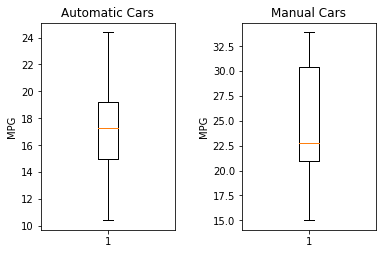

In [22]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)

mpg_automatic_plt = plt.subplot(1,2,1)
mpg_automatic_plt.set_title("Automatic Cars")
plt.boxplot(mpg_automatic_quartiles)
plt.ylabel("MPG")

mpg_manual_plt = plt.subplot(1,2,2)
mpg_manual_plt.set_title("Manual Cars")
plt.boxplot(mpg_manual_quartiles)
plt.ylabel("MPG")

plt.show()

**Analysis of Fuel Efficiency in each group (Automatic and Manual)**

With respect to **Automatic cars**, the data seems to be slightly **negatively skewed** and for **Manual cars**, the data seems to be **positively skewed**. 

In the case of **negatively** skewed data, the *mean is less than the median* and in the case of **positively** skewed data, the *mean is greater than median*. 

Overall, considering the quartiles and the skewness of the data: The range of values of MPGs for Manual cars is higher than for Automatic cars. This implies that overall Manual cars seem to be more fuel efficient than Automatic cars. 


### Question 7. What is the correlation between the weight of the car and MPG? Draw a scatter plot. What is the relationship between the two attributes?

In [23]:
#Creating a smaller dataframe to find correlation
df_wt_mpg = pd.DataFrame(df, columns = ['wt', 'mpg'])

In [24]:
df_wt_mpg.corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


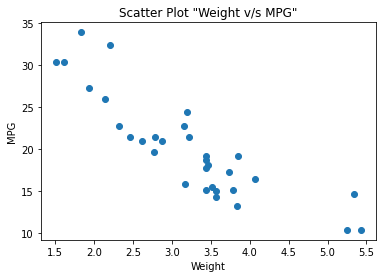

In [25]:
plt.scatter(df['wt'],df['mpg'])
plt.xlabel('Weight') 
plt.ylabel('MPG') 
plt.title('Scatter Plot "Weight v/s MPG"') 
plt.show()

**Relationship between MPG and Weight**:
The correlation coefficient generates values between -1.0 and 1.0 and these values determine how close the given points lie to a straight line. 
The correlation coefficient value for MPG and Weight is a "-0.867" which implies a strong negative correlation. This means that when one of the variables, say Weight increases, the other variable, MPG decreases. However, even though Weight and MPG seem to have a strong negative correlation, it does not necessarily imply that the behaviour one has a direct causal effect on the other. 

The results from analysis of the correlation coefficient are in agreement with those from the scatterplot as it shows that generally, for a higher MPG, the weight of the vehicle is less and for a lower MPG, the weight of the vehicle is more. 

### Question 8. Draw a side by side box plot of fuel efficiency for number of gears. Analyze and write about fuel efficiency and number of gears. 

In [26]:
mpg_3gear_quartiles = percentile(df[df['gear']==3]['mpg'], [0, 25, 50, 75, 100])

In [27]:
mpg_4gear_quartiles = percentile(df[df['gear']==4]['mpg'], [0, 25, 50, 75, 100])

In [28]:
mpg_5gear_quartiles = percentile(df[df['gear']==5]['mpg'], [0, 25, 50, 75, 100])

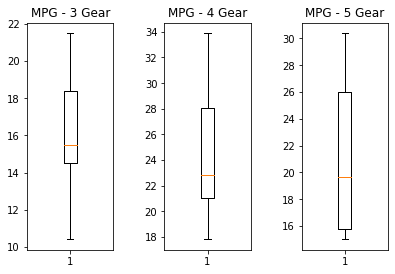

In [29]:
figure, axes = plt.subplots(nrows=1, ncols=3)
figure.tight_layout(pad=2.0)

mpg_3gear_plt = plt.subplot(1,3,1)
mpg_3gear_plt.set_title('MPG - 3 Gear')
plt.boxplot(mpg_3gear_quartiles)

mpg_4gear_plt = plt.subplot(1,3,2)
mpg_4gear_plt.set_title('MPG - 4 Gear')
plt.boxplot(mpg_4gear_quartiles)

mpg_5gear_plt = plt.subplot(1,3,3)
mpg_5gear_plt.set_title('MPG - 5 Gear')
plt.boxplot(mpg_5gear_quartiles)

plt.show()

**Analysis on fuel efficiency and gears**

For all the gears, the MPG data is positively skewed which implies that for all of them the mean value is greater than the median value. Based on the skewness and the visible ranges of all, 4 gear cars seem to be the most fuel efficient.


### Question 9. Create a crosstab displaying horse power and number of cylinders and explain the relationship between the two attributes.

In [30]:
pd.crosstab(df['cyl'], df['hp'], rownames=['cyl'], colnames=['hp'])

hp,52,62,65,66,91,93,95,97,105,109,110,113,123,150,175,180,205,215,230,245,264,335
cyl,,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,2,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,3,0,2,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,1,1,1,2,1,1


**Analysis of relationship between horsepower and number of cylinders:**

Given that a car has 
1. 4 cylinders, the horsepower seems to range 52-113, 
2. 5 cylinders, the horsepower seems to range 105-175, 
3. 6 cylinders, the horsepower seems to range 150-335.

Basically the more the number of cylinders, the higher the horsepower can expected to be. This is not a clear linear relationship but does seem to positive correlation.

### Question 10. Draw a scatter plot to understand the relationship between displacement and gross horse power. Use the correlation coefficient and infer the relationship.

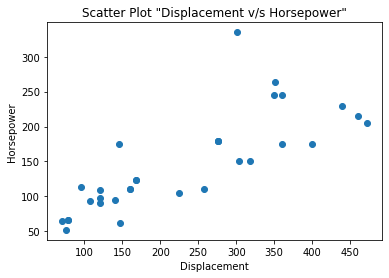

In [31]:
plt.scatter(df['disp'], df['hp'])
plt.xlabel('Displacement') 
plt.ylabel('Horsepower') 
plt.title('Scatter Plot "Displacement v/s Horsepower"') 
plt.show()

In [32]:
df_disp_hp = pd.DataFrame(df, columns = ['disp', 'hp'])

In [33]:
df_disp_hp.corr()

,disp,hp
disp,1.000000,0.790949
hp,0.790949,1.000000


**Inference**

The Displacement and Horsepower variables show a high positive correlation of "0.79" which implies that the two variables increase or decrease together, in other words they move in "tandem"

The scatterplot is in agreement with this conclusion as it shows that for a lower displacement, the horsepower is lower and for a higher displacement, the horsepower is higher.